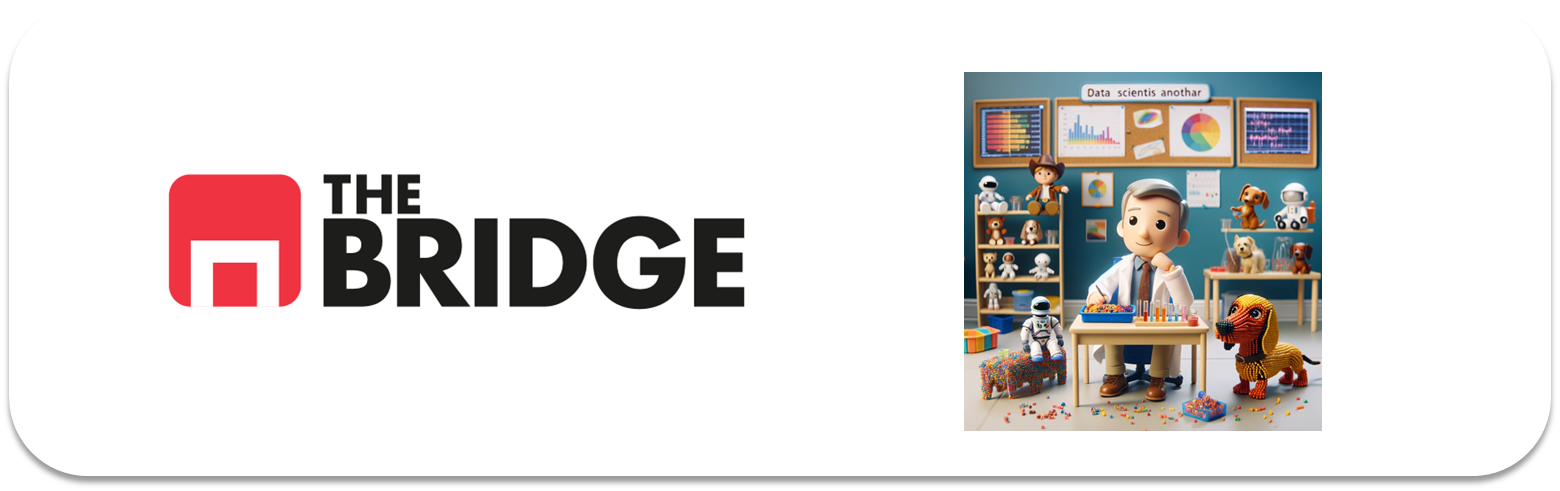

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools as bp

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()



def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [188]:
sns.get_dataset_names()
df_titanic = sns.load_dataset('titanic')

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [189]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [190]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [191]:
df_titanic.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [192]:
df_titanic = df_titanic.dropna()

In [193]:
#df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].mean())
# moda = df_titanic['deck'].mode()[0]  # La moda más frecuente
# df_titanic['deck'] = df_titanic['deck'].fillna(moda)

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.


| **Columna/Variable** | **Descripción** |
|----------------------|-----------------|
| `survived`          | Indica si el pasajero sobrevivió al hundimiento del Titanic. Valor 0 para no sobrevivió y 1 para sobrevivió. |
| `pclass`            | Clase del pasajero en el barco: 1 (Primera clase), 2 (Segunda clase), 3 (Tercera clase). |
| `sex`               | Género del pasajero: `male` (hombre) o `female` (mujer). |
| `age`               | Edad del pasajero en años |
| `sibsp`             | Número de hermanos o cónyuges que el pasajero tenía a bordo del Titanic. |
| `parch`             | Número de padres o hijos que el pasajero tenía a bordo del Titanic. |
| `fare`              | Tarifa pagada por el boleto del pasajero. Valor numérico. |
| `embarked`          | Puerto donde el pasajero embarcó: `C` (Cherbourg), `Q` (Queenstown), `S` (Southampton). |
| `class`             | Clase del pasajero en formato texto: `First`, `Second`, o `Third`. Corresponde a `pclass`. |
| `who`               | Clasificación simplificada del pasajero según género y edad: `man`, `woman`, o `child`. |
| `adult_male`        | Indica si el pasajero es un hombre adulto: `True` o `False`. |
| `deck`              | Cubierta del barco en la que se encontraba la cabina del pasajero. |
| `embark_town`       | Ciudad de embarque del pasajero: `Cherbourg`, `Queenstown`, o `Southampton`. Corresponde a `embarked`. |
| `alive`             | Indica si el pasajero estaba vivo (`yes`) o no (`no`). Corresponde a `survived`. |
| `alone`             | Indica si el pasajero viajaba solo (`True`) o acompañado (`False`), calculado en base a `sibsp` y `parch`. |


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [194]:

# Crear el DataFrame para la tipificación
df_tipificacion = pd.DataFrame({
        "Card": df_titanic.nunique(),
        "%_Card": (df_titanic.nunique() / len(df_titanic)) * 100,
        "Tipo": df_titanic.dtypes
    })
    
# Asignar tipo de variable basado en la cardinalidad
df_tipificacion["Tipo_variable"] = "Nulo"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Tipo_variable"] = "Numerica"
df_tipificacion.loc[df_tipificacion["Card"] <= 10, "Tipo_variable"] = "Categorica"

# Extraer listas de columnas categóricas y numéricas
categorica = df_tipificacion[df_tipificacion["Tipo_variable"] == "Categorica"].index.tolist()
numerica = df_tipificacion[df_tipificacion["Tipo_variable"] == "Numerica"].index.tolist()

df_tipificacion

,Card,%_Card,Tipo,Tipo_variable
survived,2,1.098901,int64,Categorica
pclass,3,1.648352,int64,Categorica
sex,2,1.098901,object,Categorica
age,63,34.615385,float64,Numerica
sibsp,4,2.197802,int64,Categorica
parch,4,2.197802,int64,Categorica
fare,93,51.098901,float64,Numerica
embarked,3,1.648352,object,Categorica
class,3,1.648352,category,Categorica
who,3,1.648352,object,Categorica


### #2.1 Categóricas

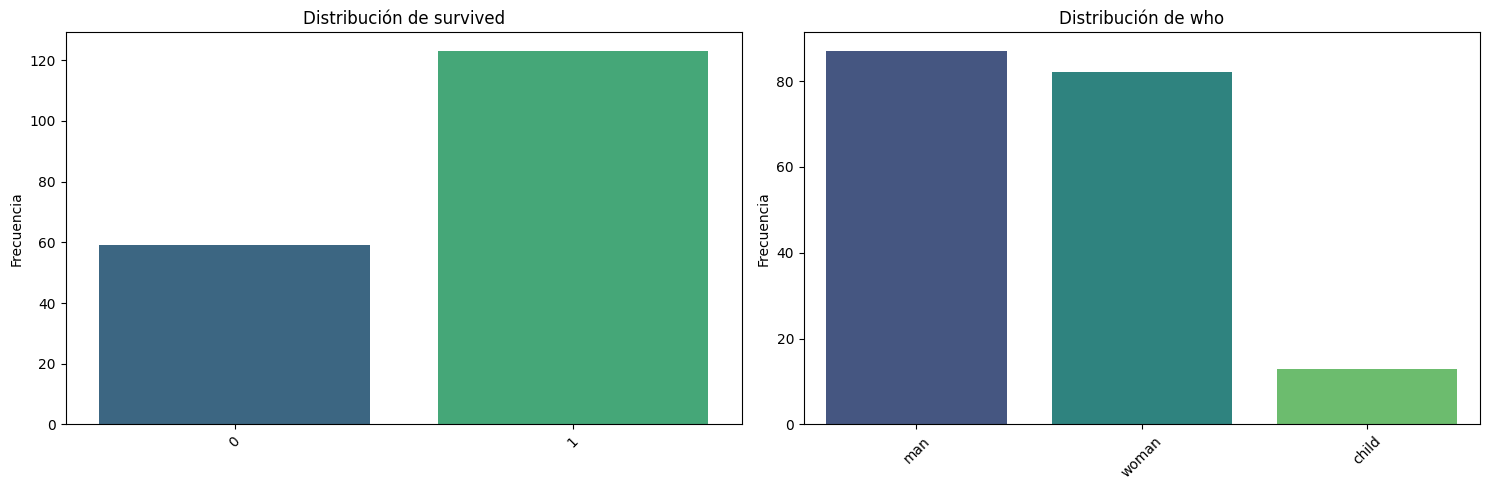

In [195]:
pinta_distribucion_categoricas(df_titanic,["survived","who"])

Podemos ver como la mayoria de gente sobrevivio al titanic y que la mayoria de personas en el barco eran hombres y mujeres con algunos niños,  veamos Cuanta de la gente que murio eran hombres niños o mujeres?

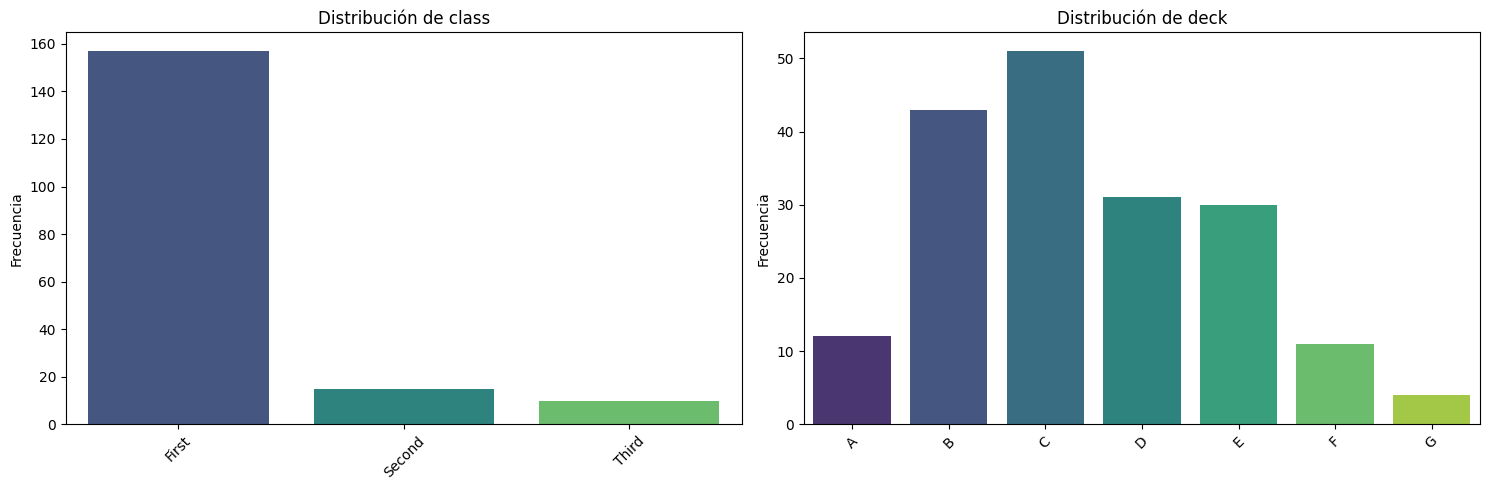

In [196]:
pinta_distribucion_categoricas(df_titanic,["class", "deck"])

La mayoria de la gente viajaba en primera clase y un muy poca gente en el resto de clases, el titanic era un barco de lujo

La mayoria de gente se acumulaba en el deck c y b

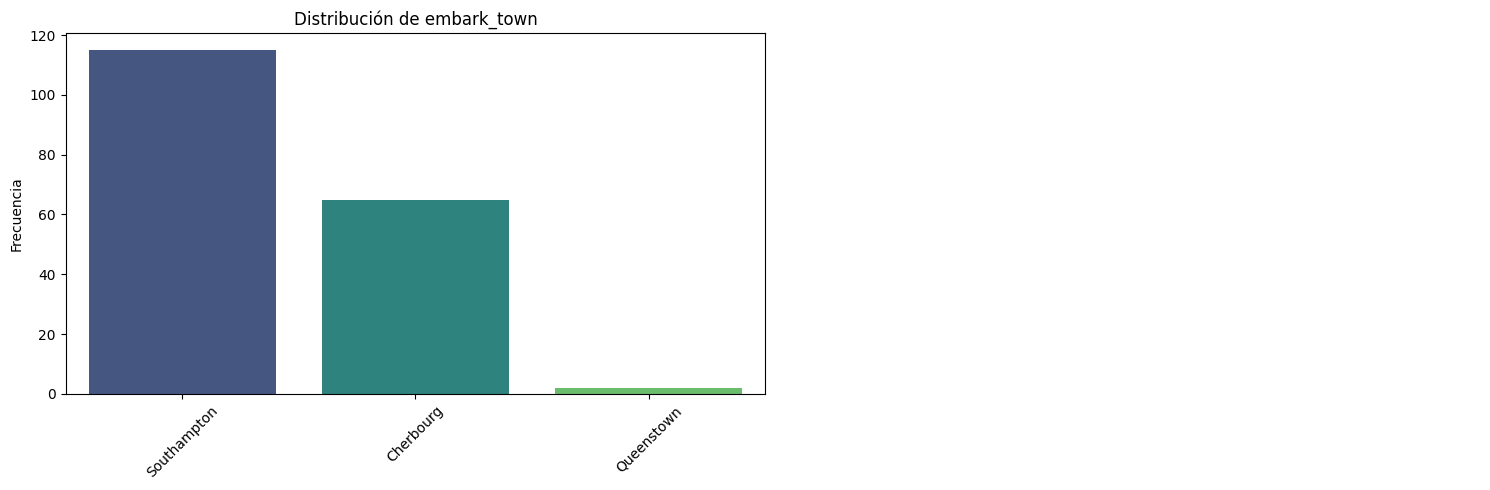

In [197]:
pinta_distribucion_categoricas(df_titanic,["embark_town"])

La mayoria de gente veniad e shouthampton

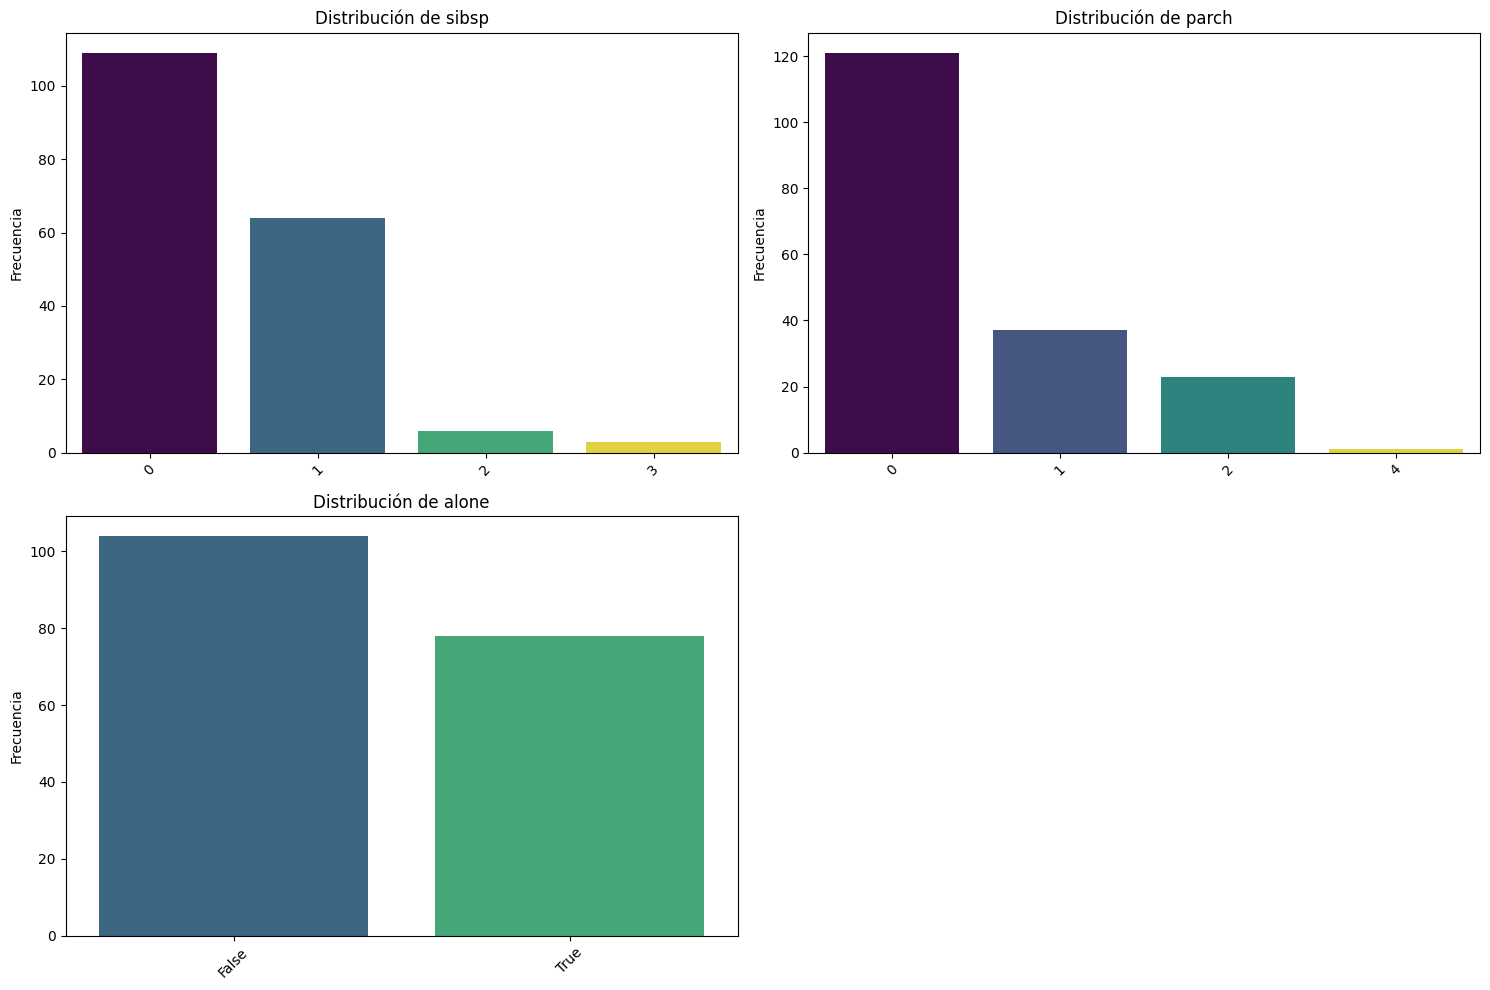

In [198]:
pinta_distribucion_categoricas(df_titanic,["sibsp","parch","alone"])

La mayoria de gente no tenia un familiar dentro, pero habia cierta cantidad que tenia 1 hijo, pareja, padre o hermano y esto queda reflejado al ver la distribucion de la columna alone

#### Habiendo visto un poco la distribucion de las muestras categoricas, me surgen las siguientes preguntas:

1. Es verdad que como en la pelicula la mayoria de personas que se salvaron fueron mujeres y niños?
2. Se salvaron hombres tambien? y si es asi, estos que se salvaron tenian familia?
3. Aunque el titanic era un barco de lujo y la mayoria de gente viajaba en primera clase, de la gente que se salvo habia personas de las demás clases?
4. De la gente que fallecio la mayoria viajaban solos? las mujeres que viajaban solas pudieron salvarse tambien o dieron prioridad a las mujeres que tenian familia?
5. La gente de segunda y tercera clase tenia mas familia que la de primera clase?
6. Hay alguna relacion entre el fallecimiento/supervivencia de la gente y su lugar de embarque?



1. Es verdad que como en la pelicula la mayoria de personas que se salvaron fueron mujeres y niños?

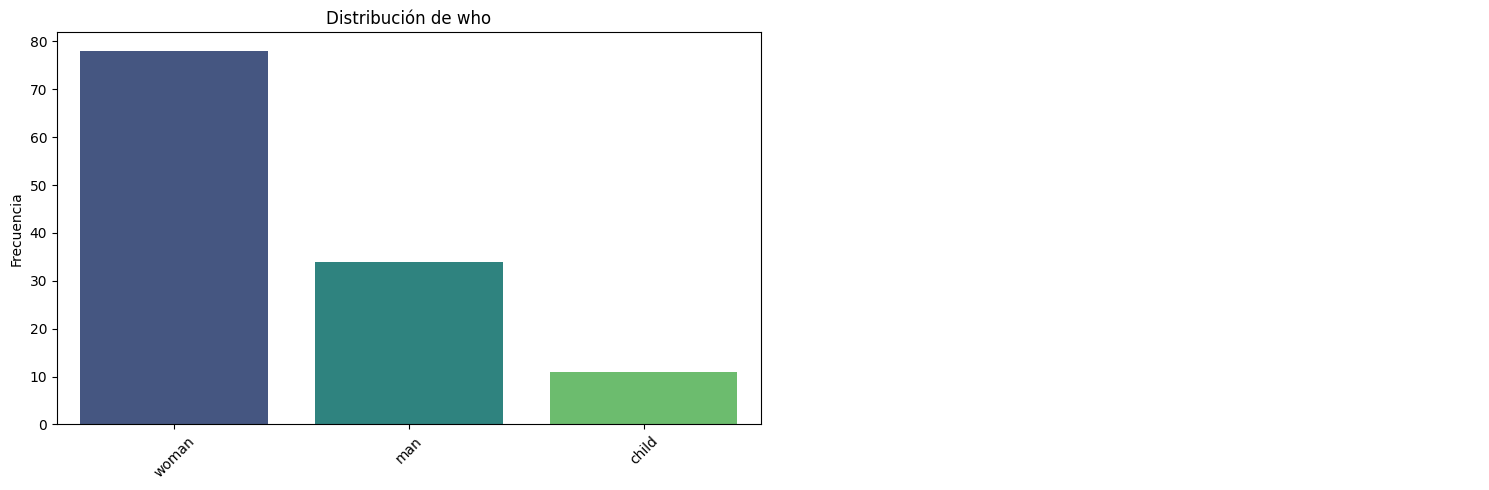

In [199]:
supervivientes = df_titanic[(df_titanic["survived"] == 1)]
pinta_distribucion_categoricas(supervivientes,["who"])

Parece cierto que la mayoria de las personas que se salvaron fueron mujeres y niños (Aunque parezca que niños no, viajaban muy pocos en el barco)

Veamos que proporcion de hombres sobrevivio respecto a la que fallecio:

2. Se salvaron hombres tambien? y si es asi, estos que se salvaron tenian familia?

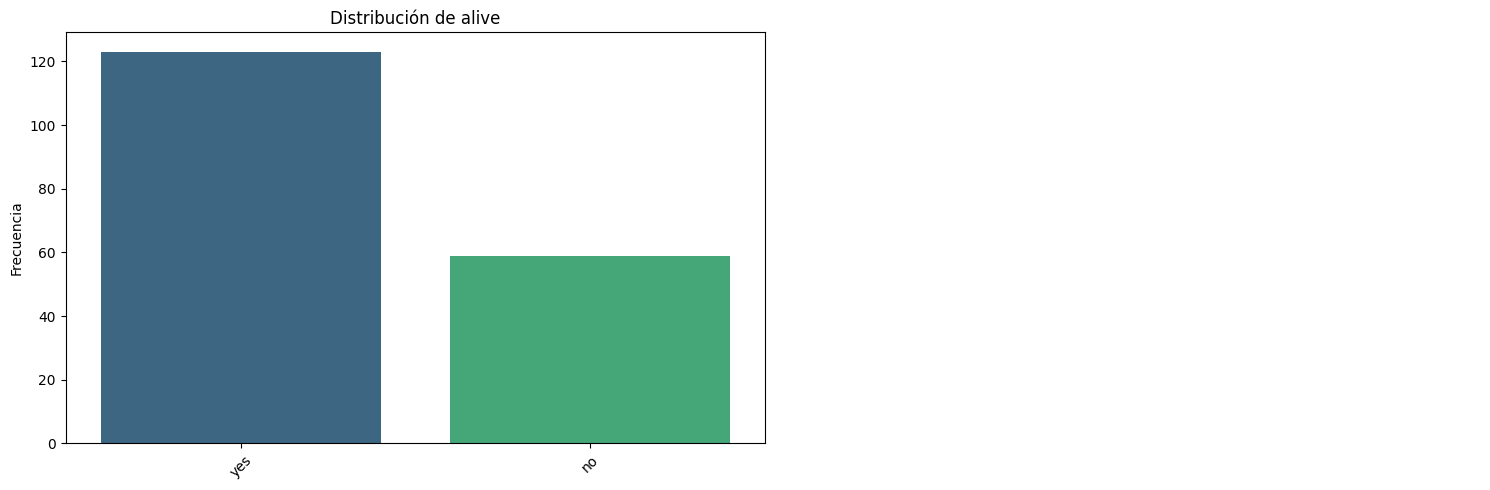

In [210]:

pinta_distribucion_categoricas(df_titanic,["alive"])


Como se puede comprobar sobrevivieron más hombres de los que fallecieron, veamos su situación familiar y socioeconomica:

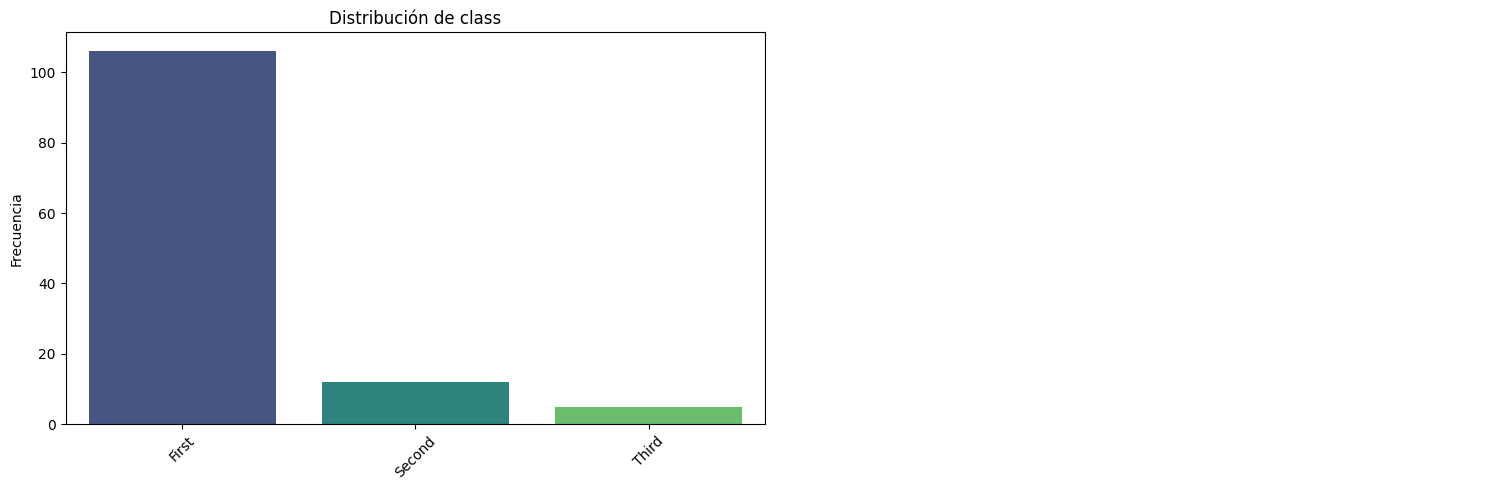

In [201]:
pinta_distribucion_categoricas(supervivientes,["class"])

La mayoria de los que se salvaron eran los que pertenecian a primera clase, aunque la mayoría de pasajeros eran de primera clase , habria que ver los hombres que no sobrevivieron para ver si hay una distincion social en los supervivientes

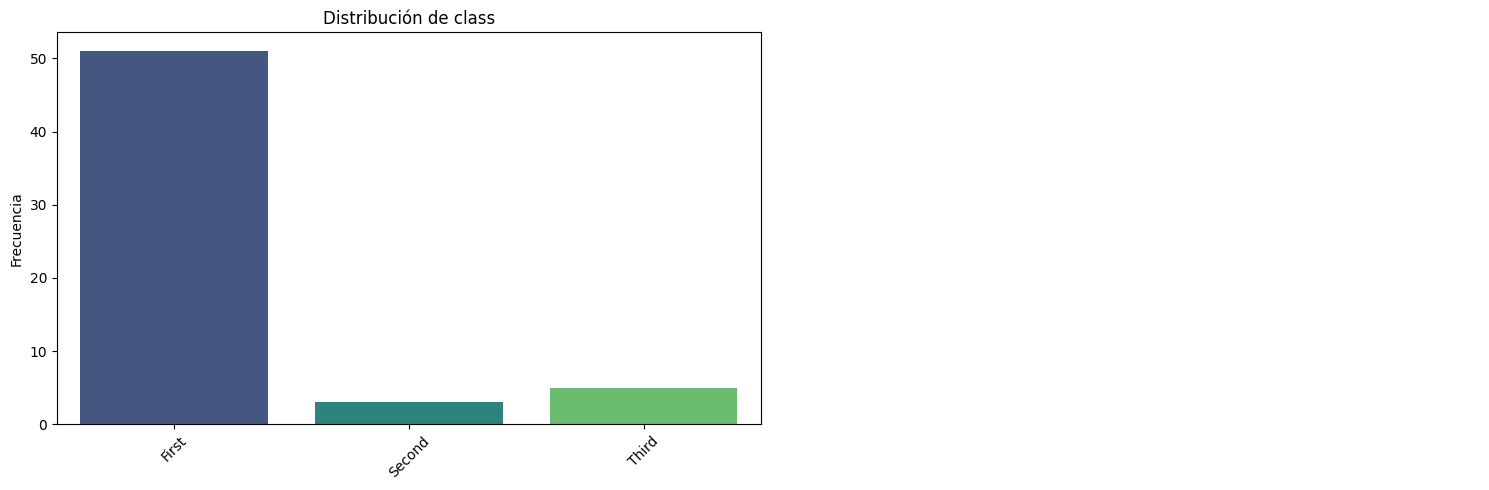

In [202]:
fallecidos = df_titanic[(df_titanic["survived"] == 0)]
pinta_distribucion_categoricas(fallecidos,["class"])

No parece haber distincion social en las muertes

Veamos la familia de los supervivientes:

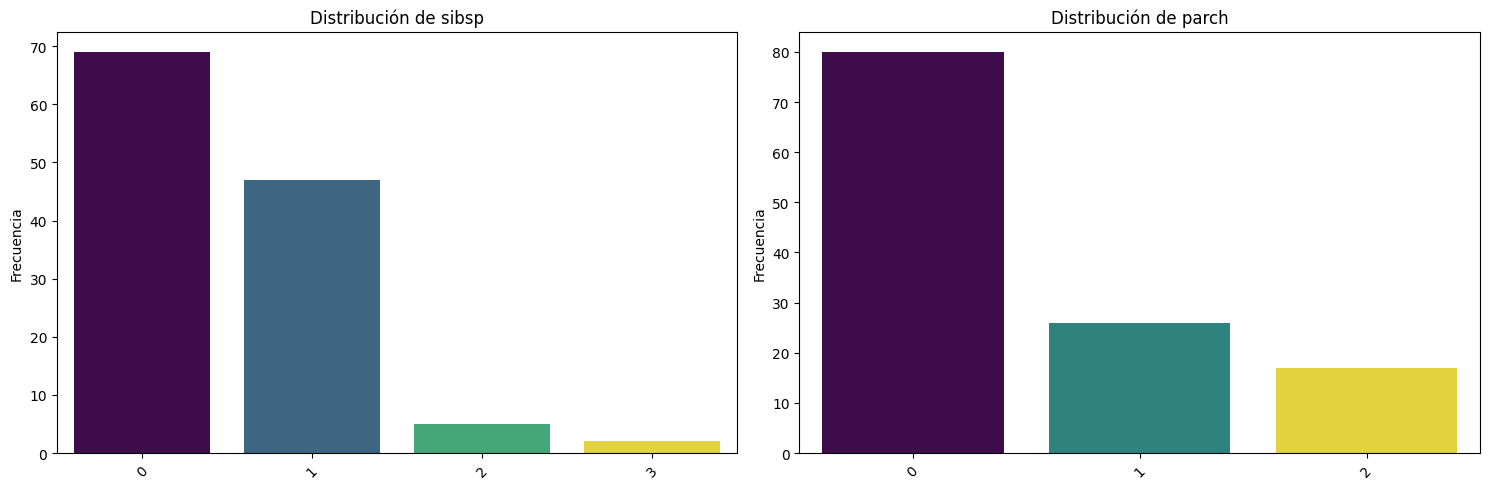

In [203]:
pinta_distribucion_categoricas(supervivientes,["sibsp","parch"])

Curioso la mayoría de hombres  supervivientes, no tienen familia, solo destacable que habia cierta cantidad de hombres tenian un conyuge, hermano o hijo en el barco

3. Aunque el titanic era un barco de lujo y la mayoria de gente viajaba en primera clase, de la gente que se salvo habia personas de las demás clases?

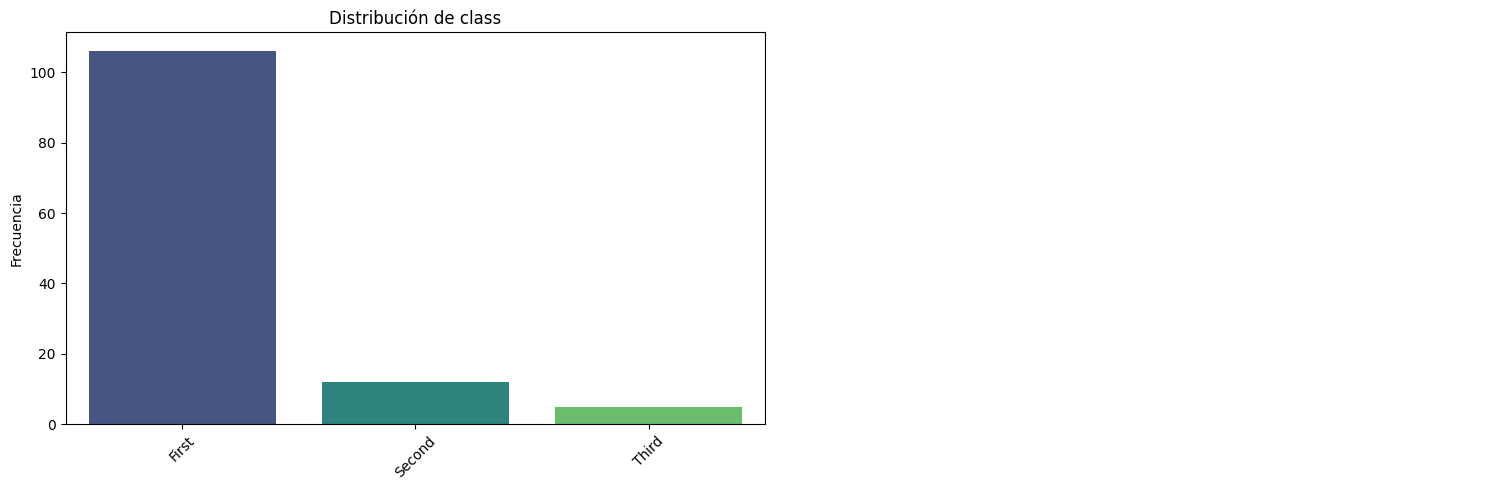

In [205]:
pinta_distribucion_categoricas(supervivientes,["class"])

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


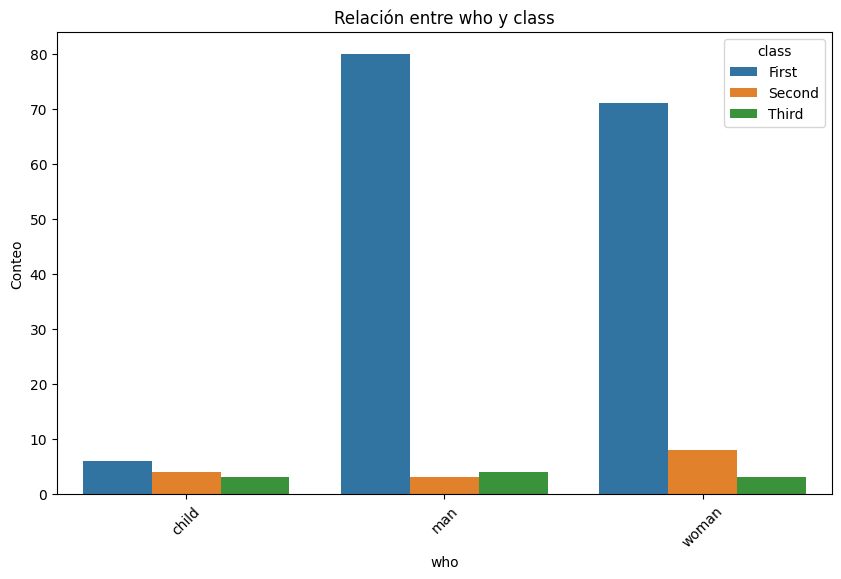

In [253]:
bp.plot_categorical_relationship_fin(df_titanic,"who","class")

Si parece que hay gente que sobrevivio de otras clases que no fueran la primera pero veamos exactamente cuantos:

In [220]:
segunda_clase = supervivientes[supervivientes["class"] == "Second"]
tercera_clase = supervivientes[supervivientes["class"] == "Third"]
primera_clase = supervivientes[supervivientes["class"] == "First"]

print(f"El numero de supervivientes en segunda clase es: {len(segunda_clase)}")
print(f"El numero de supervivientes en tercera clase es: {len(tercera_clase)}")
print(f"El numero de supervivientes en primera clase es: {len(primera_clase)}")

El numero de supervivientes en segunda clase es: 12
El numero de supervivientes en tercera clase es: 5
El numero de supervivientes en primera clase es: 106


In [221]:
segunda_clase = fallecidos[fallecidos["class"] == "Second"]
tercera_clase = fallecidos[fallecidos["class"] == "Third"]
primera_clase = fallecidos[fallecidos["class"] == "First"]

print(f"El numero de supervivientes en segunda clase es: {len(segunda_clase)}")
print(f"El numero de supervivientes en tercera clase es: {len(tercera_clase)}")
print(f"El numero de supervivientes en primera clase es: {len(primera_clase)}")

El numero de supervivientes en segunda clase es: 3
El numero de supervivientes en tercera clase es: 5
El numero de supervivientes en primera clase es: 51


4. De la gente que fallecio la mayoria viajaban solos? las mujeres que viajaban solas pudieron salvarse tambien o dieron prioridad a las mujeres que tenian familia?

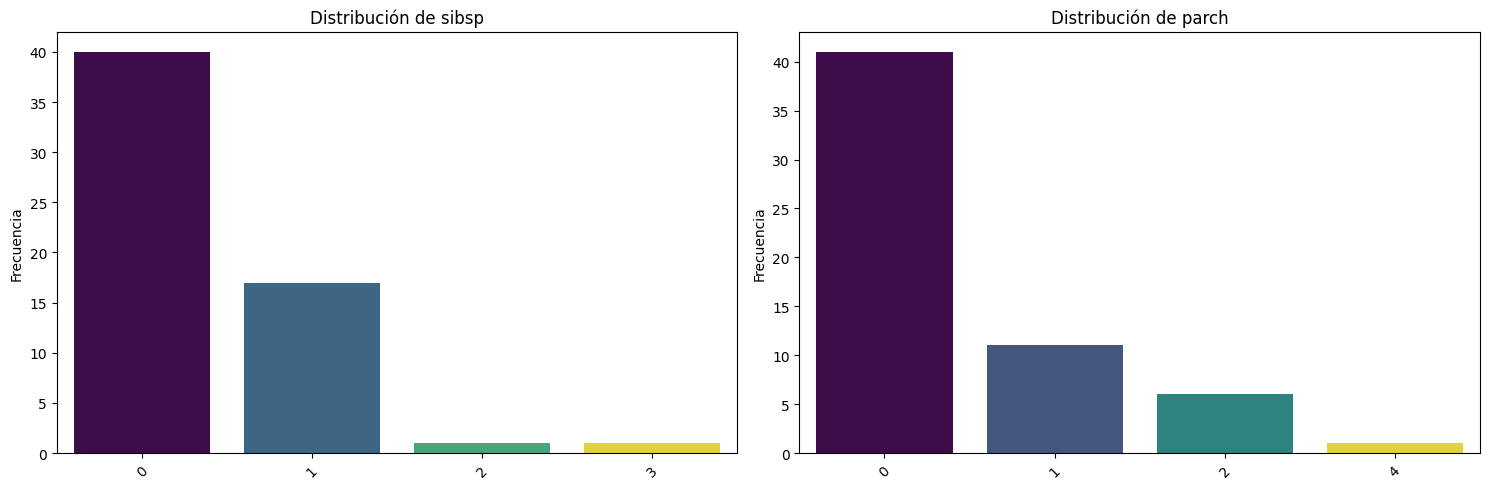

In [223]:
pinta_distribucion_categoricas(fallecidos,["sibsp","parch"])

Se puede ver como la mayoria de gente que fallecio viajo sola, veamos las mujeres:

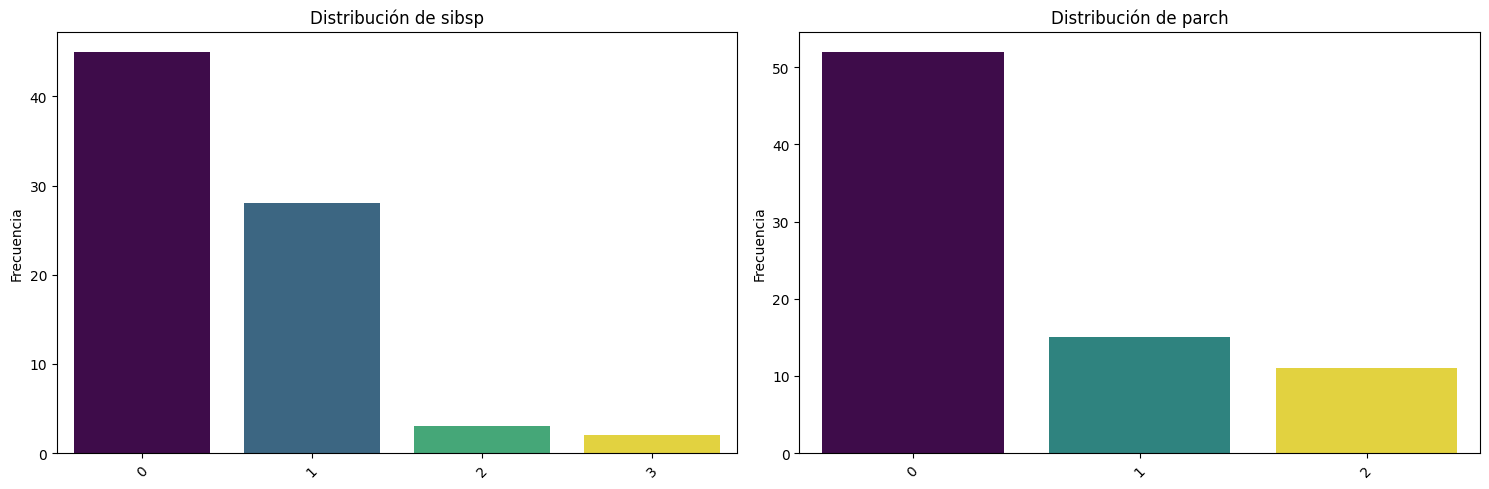

In [241]:
mujeres = df_titanic[(df_titanic["who"] == "woman")]
mujeres_supervientes = mujeres[(mujeres["survived"] == 1)]


pinta_distribucion_categoricas(mujeres_supervientes,["sibsp","parch"])

Se ve que no hicieron distinciones y que las mujeres solteras tambien sobrevivieron y son su mayoria

5. La gente de segunda y tercera clase tenia mas familia que la de primera clase?


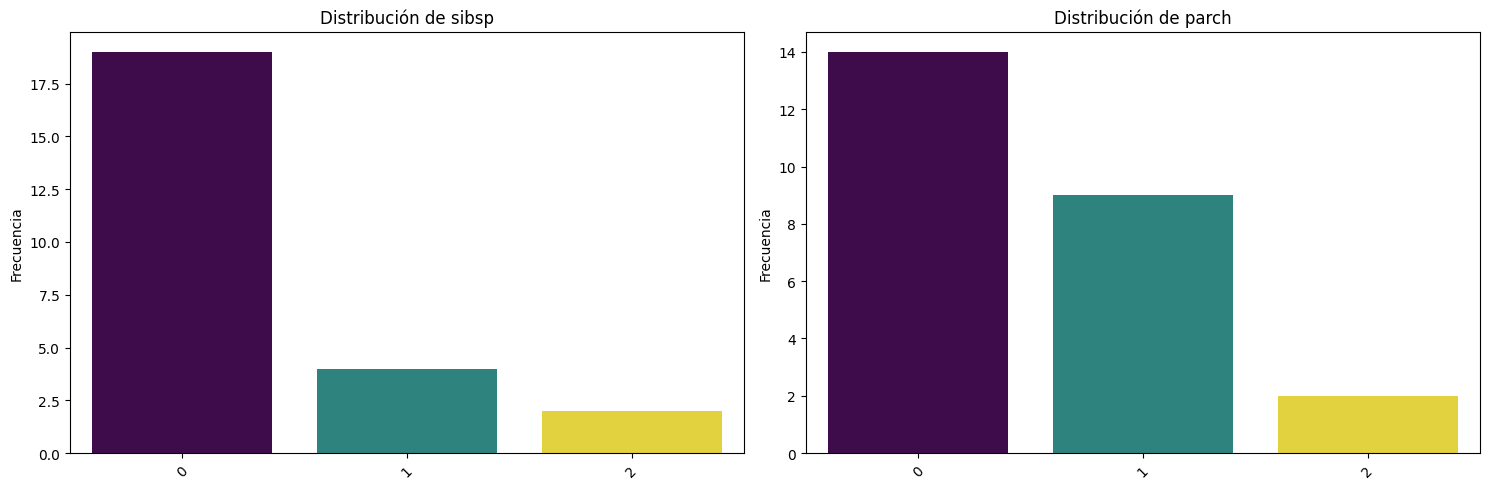

In [244]:
tercera_segunda = df_titanic[(df_titanic["class"] == "Second") | (df_titanic["class"] == "Third")]
primera = df_titanic[(df_titanic["class"] == "First")]

pinta_distribucion_categoricas(tercera_segunda,["sibsp","parch"])

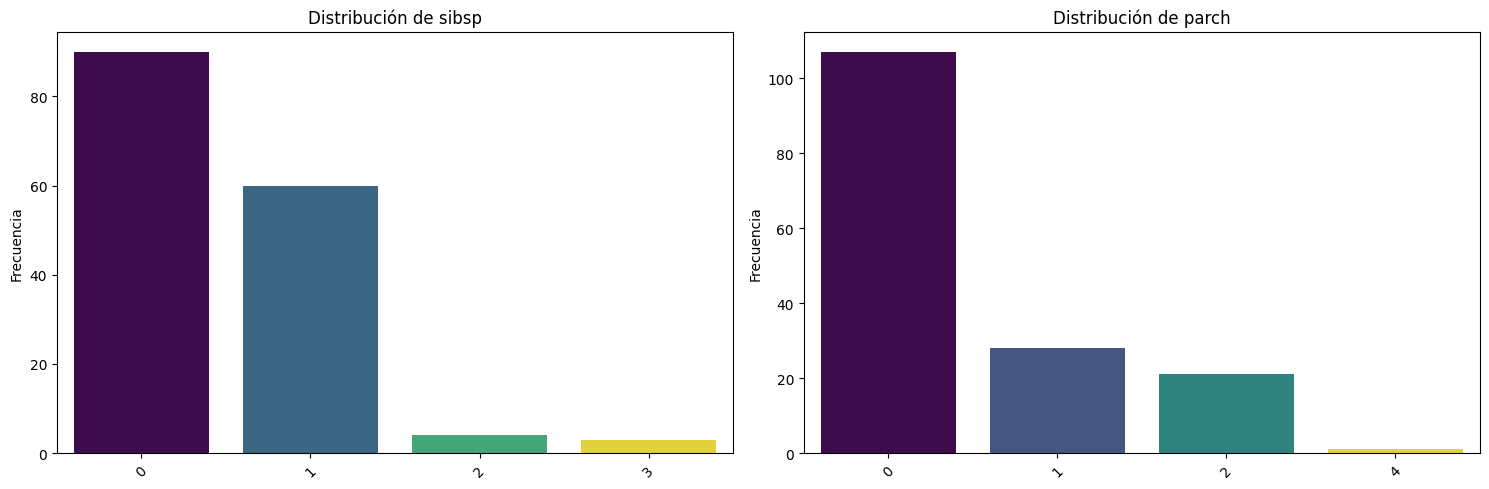

In [245]:
pinta_distribucion_categoricas(primera,["sibsp","parch"])

No, la mayoria de personas de tercera y segunda clase fueron sin familia, lo que me hace pensar que en estas clases se encontraban tripulantes que trabajaban tal vez para el funcionamiento/mantenimiento del barco 

6. Hay alguna relacion entre el fallecimiento/supervivencia de la gente y su lugar de embarque?


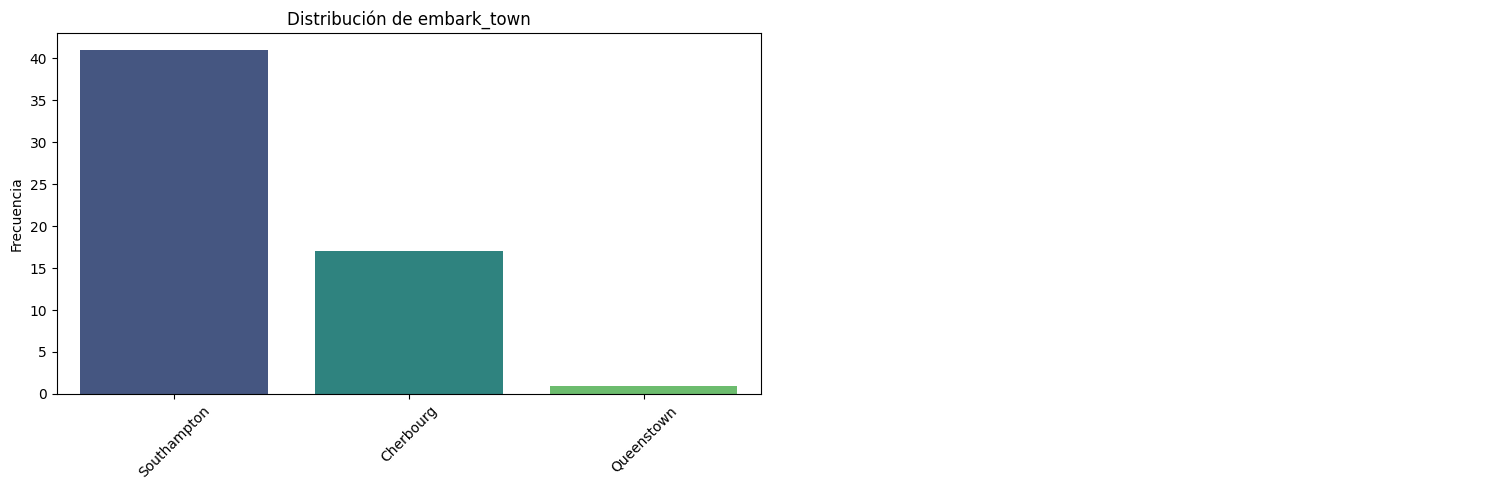

In [247]:
pinta_distribucion_categoricas(fallecidos,["embark_town"])

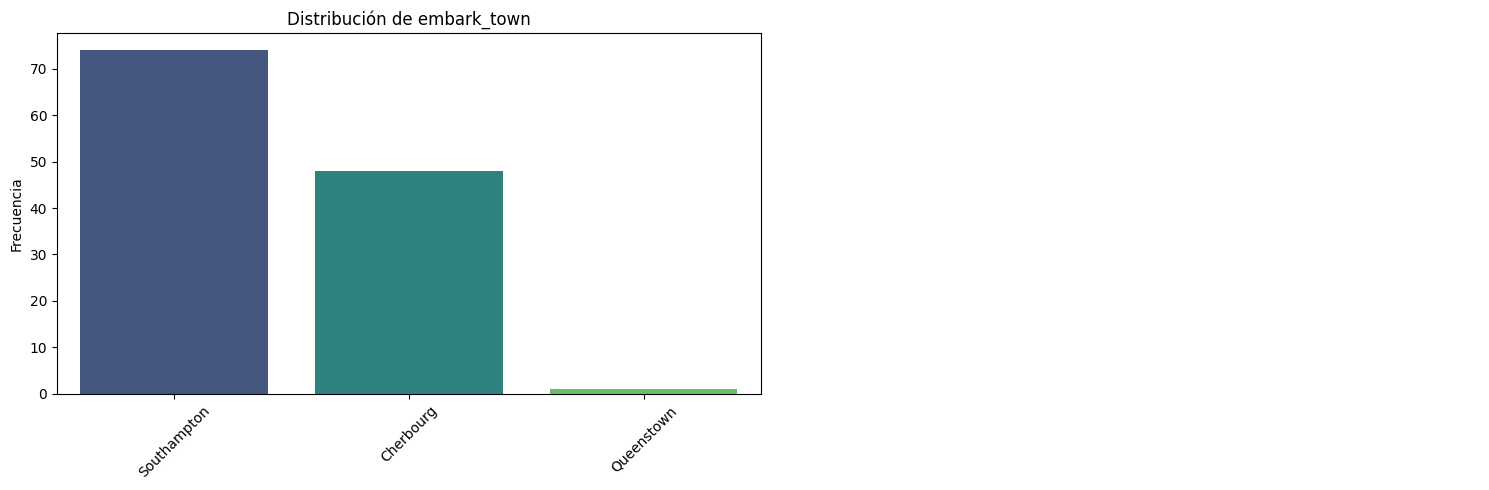

In [248]:
pinta_distribucion_categoricas(supervivientes,["embark_town"])

No veo ninguna relación la mayoria de ellos proceden de Southampton

### #2.2 Numéricas

(2, 2)


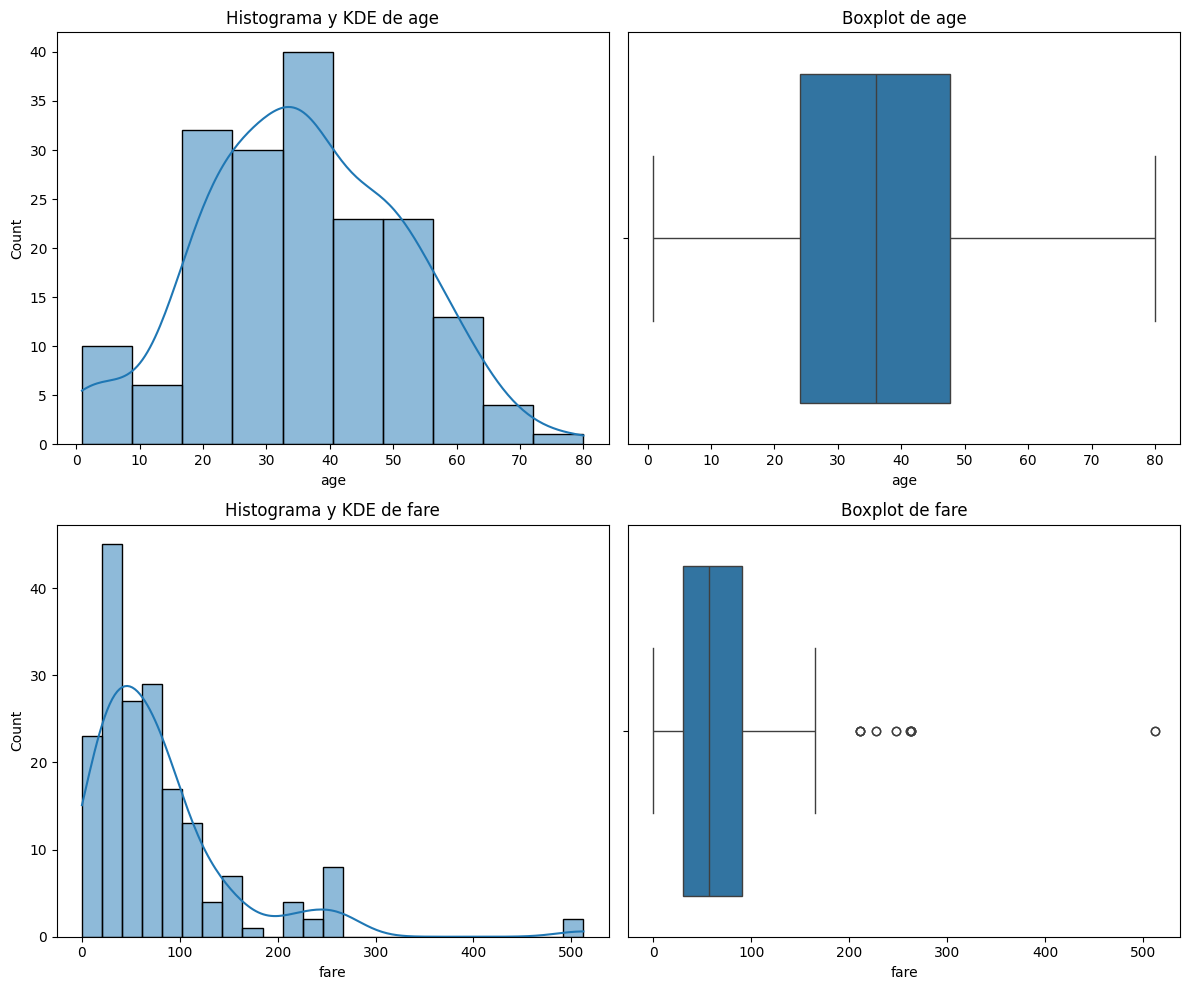

In [209]:
plot_combined_graphs(df_titanic,numerica)

¿Existe una relación entre la edad y la clase?

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


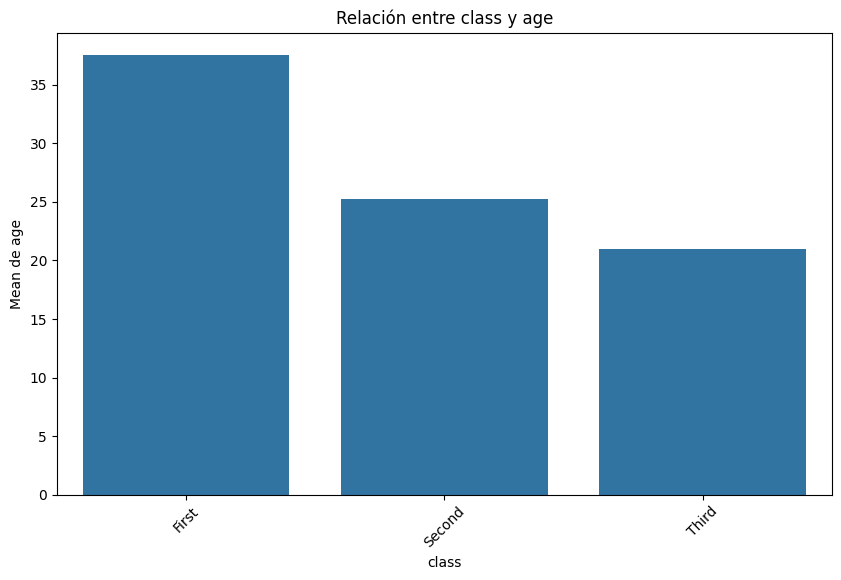

In [255]:
bp.plot_categorical_numerical_relationship(df_titanic,"class","age")

Parece que si, a más edad, mejor clase en el barco

¿Tiene relación la clase con el precio del ticket?

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


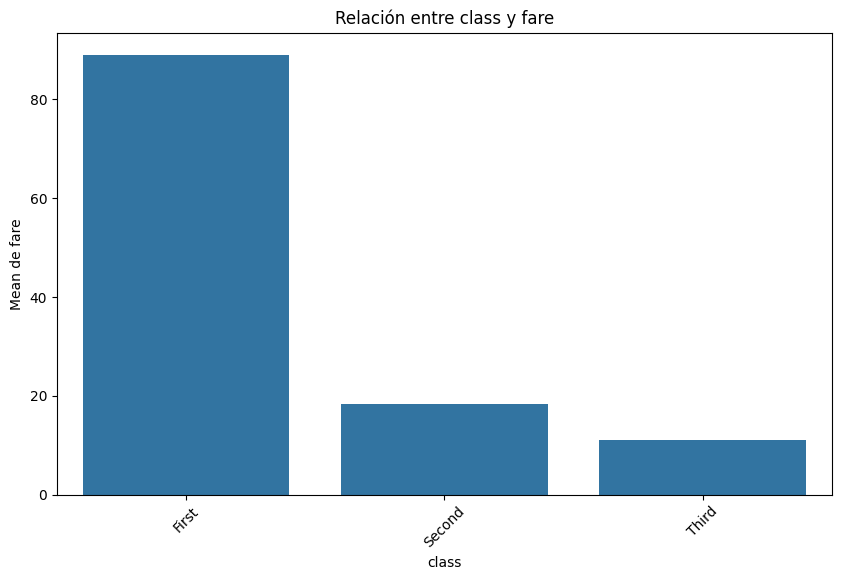

In [256]:
bp.plot_categorical_numerical_relationship(df_titanic,"class","fare")

Si es algo evidente

¿Que relacion tienen las dos variables númericas?

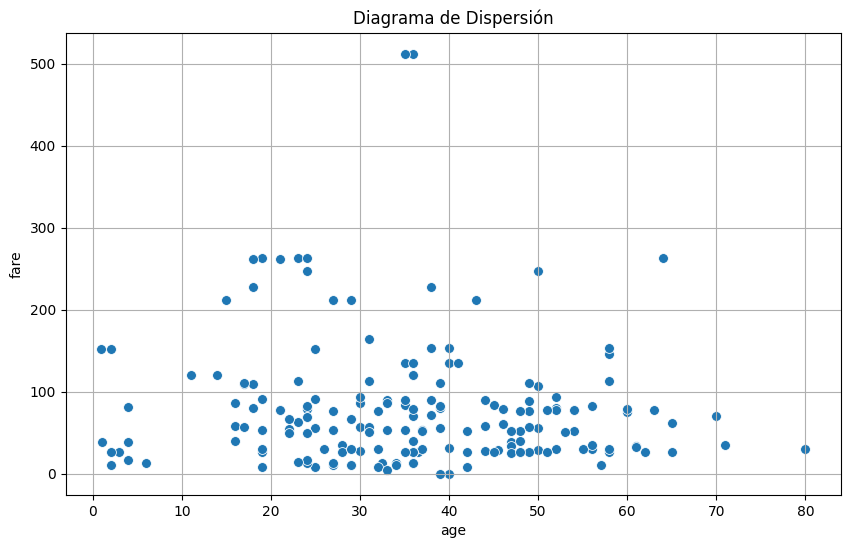

In [261]:
bp.grafico_dispersion_con_correlacion(df_titanic,"age","fare")

Entre los 20 y 30 años es cuando más paga la gente por ticket

¿De donde viene la gente que paga mas por sus tickets?

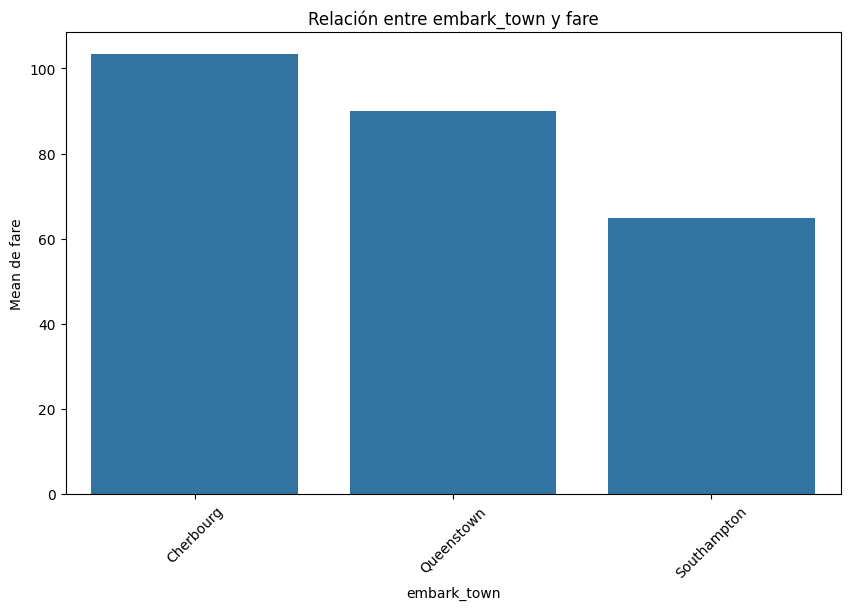

In [262]:
bp.plot_categorical_numerical_relationship(df_titanic,"embark_town","fare")

Parece que vienen de Cherbourg